In [1]:
from sklearn.datasets import make_blobs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
X, y = make_blobs(n_samples=3000, centers=3, n_features=4, random_state=0)
df1 = pd.DataFrame(X, columns=[f'Feature_{i+1}' for i in range(4)])
df1['Class'] = y

In [3]:
def show_plot(df):
    dataset_shape = df.shape
    num_features = df.shape[1] - 1
    target_classes_count = df['Class'].value_counts()
    missing_percentage = df.isnull().mean() * 100
    description = df.describe()

    print(dataset_shape, '\n', f'Num of features {num_features}\n', target_classes_count,
      f' Missing percentage: {missing_percentage}\n', description)
    correlation_matrix = df1.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix of df1')
    plt.show()
    sns.pairplot(df1, hue='Class', diag_kind='kde')
    plt.show()

(3000, 5) 
 Num of features 4
 Class
1    1000
0    1000
2    1000
Name: count, dtype: int64  Missing percentage: Feature_1    0.0
Feature_2    0.0
Feature_3    0.0
Feature_4    0.0
Class        0.0
dtype: float64
          Feature_1    Feature_2    Feature_3    Feature_4        Class
count  3000.000000  3000.000000  3000.000000  3000.000000  3000.000000
mean      2.886732     1.615202     2.199980     3.087975     1.000000
std       4.728501     3.032537     3.046773     3.493286     0.816633
min      -4.653105    -5.928333    -4.175589    -2.494636     0.000000
25%      -0.936722    -1.695545    -0.578033     0.393178     0.000000
50%       0.968278     2.760219     2.030200     1.393745     1.000000
75%       8.563355     3.988266     5.126213     7.241278     2.000000
max      12.330357     6.966514     9.291680    10.838583     2.000000


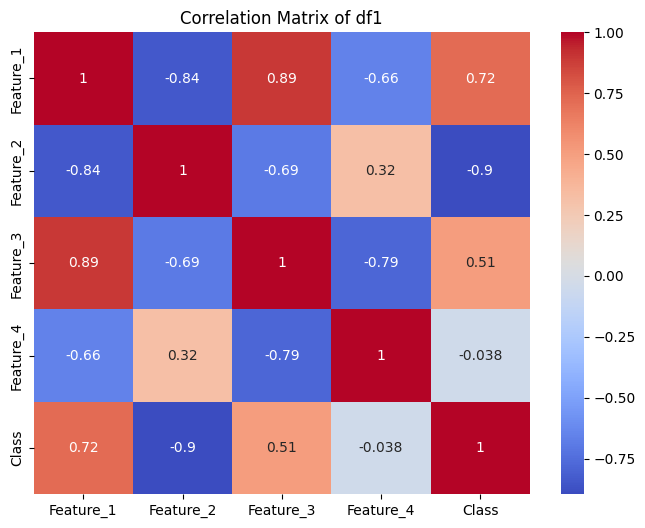

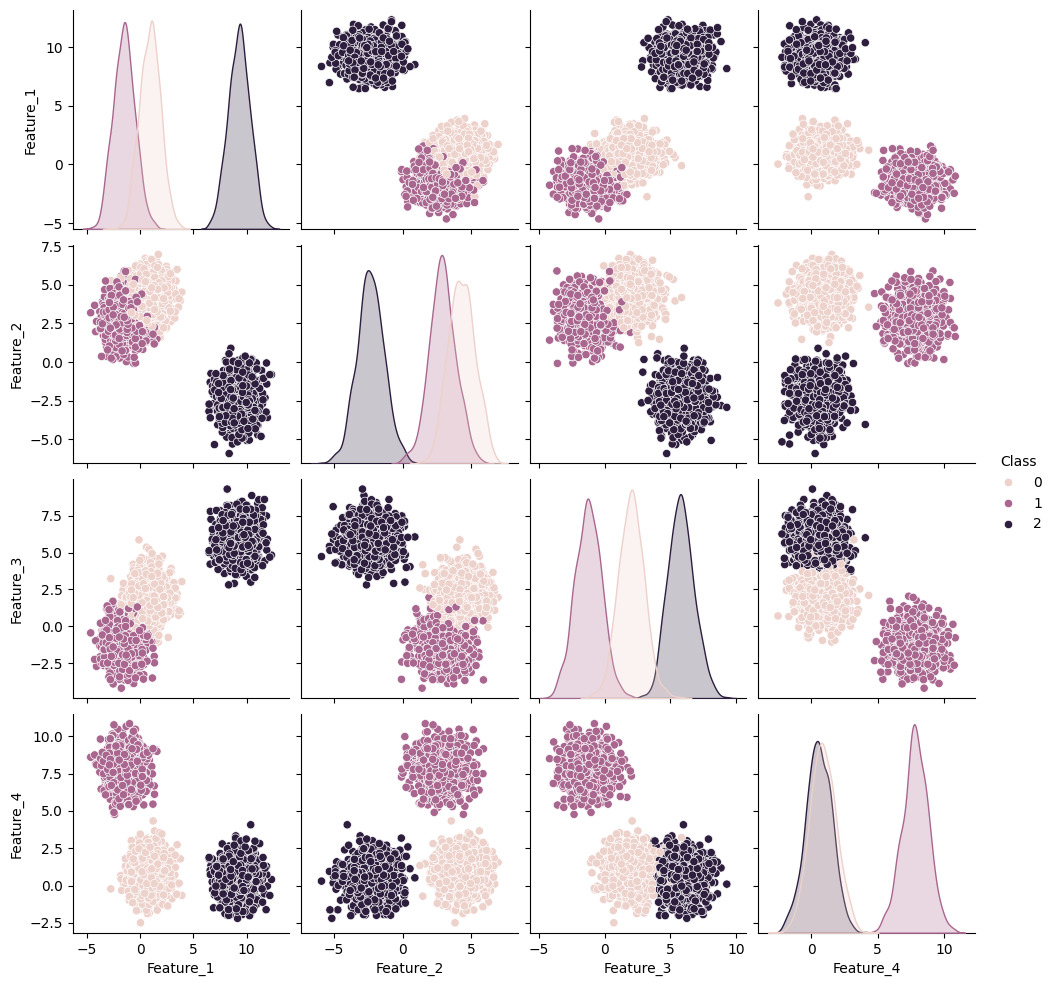

In [4]:
show_plot(df1)

In [5]:
def create_repeated_class_datasets(df, class_label, repetitions):
    df_repeated = df[df['Class'] == class_label].copy()
    df_repeated = df_repeated.loc[df_repeated.index.repeat(repetitions)].reset_index(drop=True)
    df_remaining = df[df['Class'] != class_label]
    df_new = pd.concat([df_repeated, df_remaining], ignore_index=True)
    return df_new

In [6]:
df2 = create_repeated_class_datasets(df1, class_label=0, repetitions=2)
df5 = create_repeated_class_datasets(df1, class_label=0, repetitions=5)
df10 = create_repeated_class_datasets(df1, class_label=0, repetitions=10)
df20 = create_repeated_class_datasets(df1, class_label=0, repetitions=20)
df50 = create_repeated_class_datasets(df1, class_label=0, repetitions=50)
df100 = create_repeated_class_datasets(df1, class_label=0, repetitions=100)
df1000 = create_repeated_class_datasets(df1, class_label=0, repetitions=1000)
df10k = create_repeated_class_datasets(df1, class_label=0, repetitions=10000)

(1002000, 5) 
 Num of features 4
 Class
0    1000000
1       1000
2       1000
Name: count, dtype: int64  Missing percentage: Feature_1    0.0
Feature_2    0.0
Feature_3    0.0
Feature_4    0.0
Class        0.0
dtype: float64
           Feature_1     Feature_2     Feature_3     Feature_4         Class
count  1.002000e+06  1.002000e+06  1.002000e+06  1.002000e+06  1.002000e+06
mean   9.154379e-01  4.294117e+00  2.027793e+00  8.909682e-01  2.994012e-03
std    1.019359e+00  9.941833e-01  9.949353e-01  1.014899e+00  7.057663e-02
min   -4.653105e+00 -5.928333e+00 -4.175589e+00 -2.494636e+00  0.000000e+00
25%    2.163358e-01  3.617686e+00  1.367968e+00  2.114441e-01  0.000000e+00
50%    9.464140e-01  4.279238e+00  2.029458e+00  8.597566e-01  0.000000e+00
75%    1.581390e+00  4.957406e+00  2.677089e+00  1.548874e+00  0.000000e+00
max    1.233036e+01  6.966514e+00  9.291680e+00  1.083858e+01  2.000000e+00


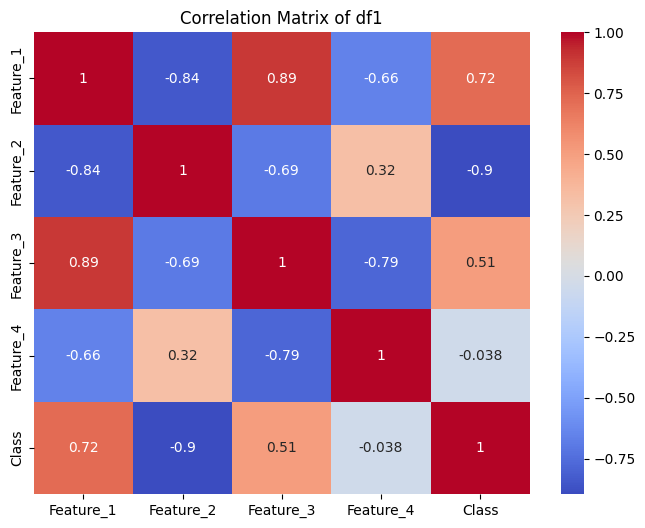

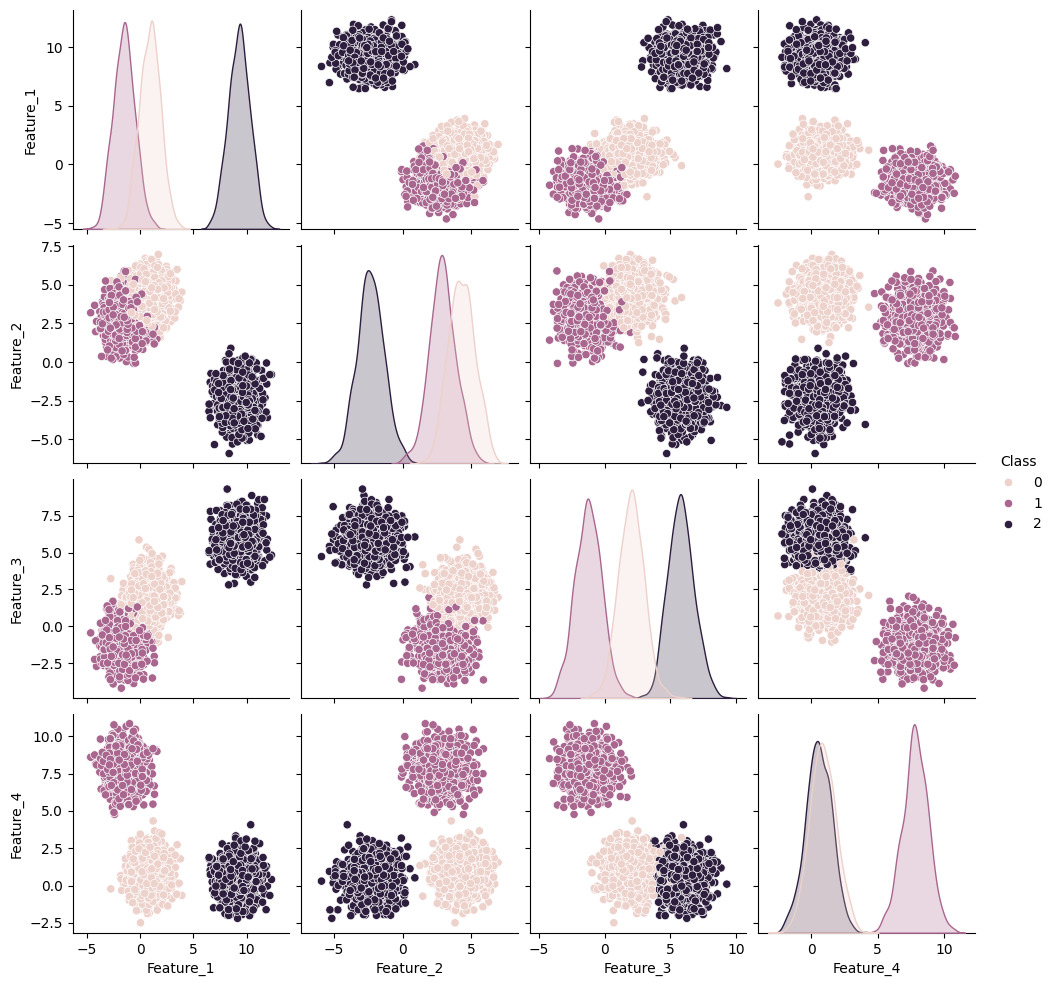

In [7]:
show_plot(df1000)

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import numpy as np

def build_lda(df, feature_names, classes):
    df_selected = df[df['Class'].isin(classes)][feature_names + ['Class']]
    lda = LDA()
    X = df_selected[feature_names]
    y = df_selected['Class']

    lda.fit(X.values, y)

    x_min, x_max = X[feature_names[0]].min() - 1, X[feature_names[0]].max() + 1
    y_min, y_max = X[feature_names[1]].min() - 1, X[feature_names[1]].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))

    Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

    plt.scatter(X[feature_names[0]], X[feature_names[1]], c=y, cmap='coolwarm', edgecolors='k')

    plt.title('LDA Decision Boundary')
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.show()

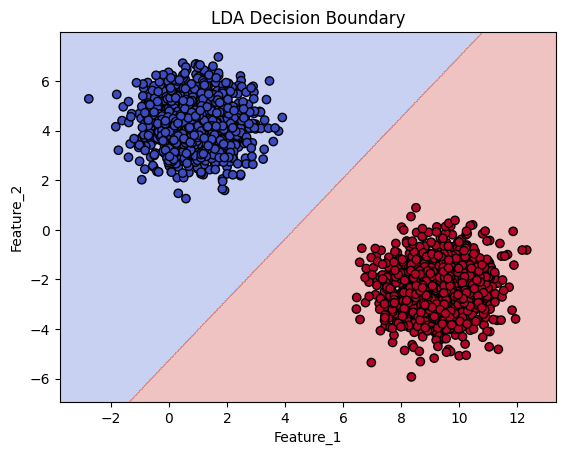

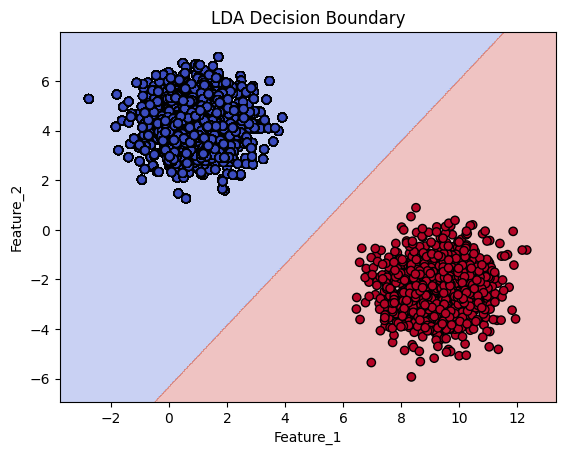

In [9]:
build_lda(df1, feature_names=['Feature_1', 'Feature_2'], classes=[0, 2])
build_lda(df1000, feature_names=['Feature_1', 'Feature_2'],  classes=[0, 2])

In [10]:
from sklearn.svm import SVC

def build_svm(df, feature_names, classes):
    df_selected = df[df['Class'].isin(classes)][feature_names + ['Class']]
    X = df_selected[feature_names]
    y = df_selected['Class']

    svm = SVC(kernel='linear')
    svm.fit(X.values, y)

    x_min, x_max = X[feature_names[0]].min() - 1, X[feature_names[0]].max() + 1
    y_min, y_max = X[feature_names[1]].min() - 1, X[feature_names[1]].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))

    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

    plt.scatter(X[feature_names[0]], X[feature_names[1]], c=y, cmap='coolwarm', edgecolors='k')

    plt.title('SVM Decision Boundary')
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.show()

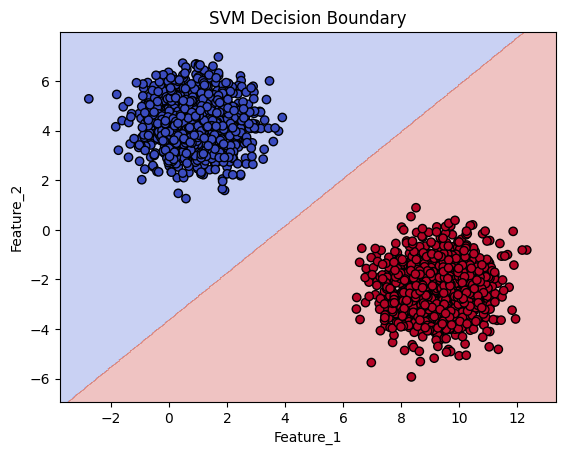

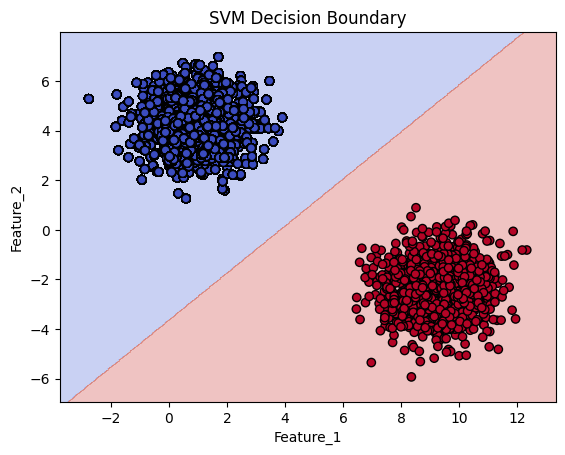

In [11]:
build_svm(df1, feature_names=['Feature_1', 'Feature_2'], classes=[0, 2])
build_svm(df1000, feature_names=['Feature_1', 'Feature_2'],  classes=[0, 2])

In [12]:
def calculate_mass_centers(df, class_labels, feature_names):
    # Выбираем только два класса и два признака
    df_selected = df[df['Class'].isin(class_labels)][feature_names + ['Class']]
    
    # Разделяем на признаки и целевой вектор
    X = df_selected[feature_names]
    y = df_selected['Class']
    
    # Вычисляем центры масс для двух классов
    center_class_0 = X[y == class_labels[0]].mean().values
    center_class_1 = X[y == class_labels[1]].mean().values
    
    # Вычисляем общий центр масс для двух классов
    common_center = X.mean().values
    
    # Центр отрезка, соединяющего центры масс классов
    center_segment = (center_class_0 + center_class_1) / 2
    
    # Обучаем LDA
    lda = LDA()
    lda.fit(X, y)
    
    # Получаем параметры разделяющей функции (w0 + w1*x1 + w2*x2 = 0)
    coef = lda.coef_[0]
    intercept = lda.intercept_[0]

    # Уравнение отрезка, соединяющего центры масс классов (линейное уравнение)
    # Мы можем найти параметрическую форму уравнения и подставить в уравнение LDA
    t = np.linspace(0, 1, 500)
    segment_line = np.outer(t, center_class_1) + np.outer((1 - t), center_class_0)

    # Ищем точку пересечения решающей функции с отрезком
    decision_boundary_values = np.dot(segment_line, coef) + intercept
    idx_intersection = np.argmin(np.abs(decision_boundary_values))
    intersection_point = segment_line[idx_intersection]

    # Возвращаем данные
    return {
        'center_segment': center_segment,
        'common_center': common_center,
        'intersection_point': intersection_point
    }

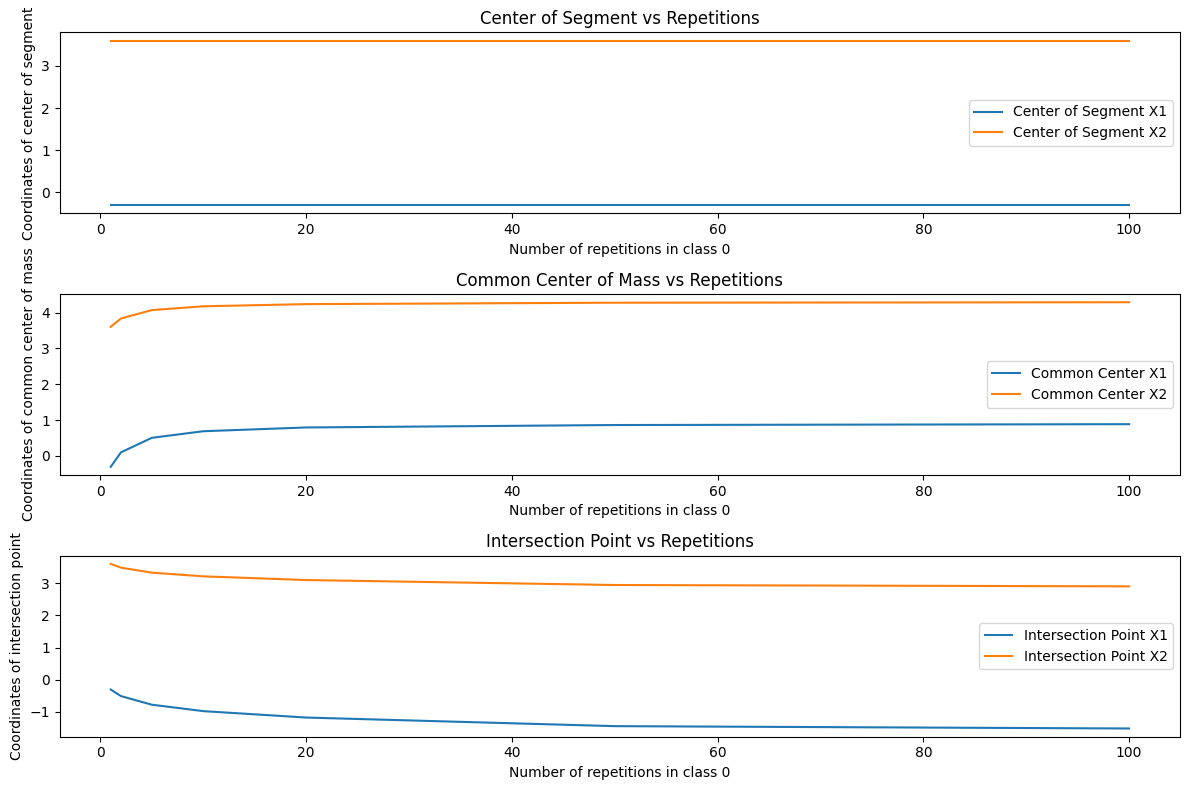

In [13]:
centers_segment = []
common_centers = []
intersection_points = []
repetitions = [1, 2, 5, 10, 20, 50, 100]

# Создаем список датасетов
datasets = [df1, df2, df5, df10, df20, df50, df100]

# Вычисляем координаты для каждого датасета
for i, df in enumerate(datasets):
    results = calculate_mass_centers(df, class_labels=[0, 1], feature_names=['Feature_1', 'Feature_2'])
    
    # Сохраняем координаты
    centers_segment.append(results['center_segment'])
    common_centers.append(results['common_center'])
    intersection_points.append(results['intersection_point'])

# Преобразуем данные в numpy массивы для удобства
centers_segment = np.array(centers_segment)
common_centers = np.array(common_centers)
intersection_points = np.array(intersection_points)

# Визуализация зависимости координат от количества повторов
plt.figure(figsize=(12, 8))

# Центр отрезка
plt.subplot(3, 1, 1)
plt.plot(repetitions, centers_segment[:, 0], label='Center of Segment X1')
plt.plot(repetitions, centers_segment[:, 1], label='Center of Segment X2')
plt.xlabel('Number of repetitions in class 0')
plt.ylabel('Coordinates of center of segment')
plt.title('Center of Segment vs Repetitions')
plt.legend()

# Общий центр масс
plt.subplot(3, 1, 2)
plt.plot(repetitions, common_centers[:, 0], label='Common Center X1')
plt.plot(repetitions, common_centers[:, 1], label='Common Center X2')
plt.xlabel('Number of repetitions in class 0')
plt.ylabel('Coordinates of common center of mass')
plt.title('Common Center of Mass vs Repetitions')
plt.legend()

# Точка пересечения решающей функции
plt.subplot(3, 1, 3)
plt.plot(repetitions, intersection_points[:, 0], label='Intersection Point X1')
plt.plot(repetitions, intersection_points[:, 1], label='Intersection Point X2')
plt.xlabel('Number of repetitions in class 0')
plt.ylabel('Coordinates of intersection point')
plt.title('Intersection Point vs Repetitions')
plt.legend()

plt.tight_layout()
plt.show()

In [14]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import precision_score, recall_score, auc


# Функция для расчета AUROC, AUPRC, AUPRgainC
def calculate_metrics(df, class_labels, feature_names, target_class):
    # Выбираем только два класса и два признака
    df_selected = df[df['Class'].isin(class_labels)][feature_names + ['Class']]
    
    # Разделяем на признаки и целевой вектор
    X = df_selected[feature_names]
    y = (df_selected['Class'] == target_class).astype(int)  # Целевой класс как бинарный вектор

    # Обучаем LDA
    lda = LDA()
    lda.fit(X, y)

    # Прогнозируем вероятности для целевого класса
    y_score = lda.predict_proba(X)[:, target_class]  # Вероятности для целевого класса

    # 1. ROC кривая и AUROC
    fpr, tpr, _ = roc_curve(y, y_score, pos_label=target_class)
    roc_auc = auc(fpr, tpr)

    # 2. PR кривая и AUPRC
    # precision, recall, thresholds = precision_recall_curve(y, y_score)
    pr_auc = average_precision_score(y, y_score, pos_label=target_class)

    # # 3. PRGain и AUPRgainC
    # precisions = []
    # recalls = []

    # for threshold in thresholds:
    #     # Convert probabilities to binary predictions
    #     y_pred = (y_score >= threshold).astype(int)
    
    #     # Calculate precision and recall
    #     prec = precision_score(y, y_pred, pos_label=target_class)
    #     rec = recall_score(y, y_pred, pos_label=target_class)
    
    #     precisions.append(prec)
    #     recalls.append(rec)

    # # Convert to numpy arrays
    # prec = np.array(precisions)
    # rec = np.array(recalls)

    # pi = np.pi
    
    # prec_gain = (precision - pi) / ((1 - pi) * precision + 0.0001)
    # rec_gain = (recall - pi) / ((1 - pi) * recall + 0.0001)
    # print(prec_gain[0], prec_gain[100])
    # print(rec_gain[0], rec_gain[100])
    # pr_gain_auc = auc(rec_gain, prec_gain)
    # # Рассчитываем площадь под PRGain кривой (AUPRgainC)
    # # pr_gain_auc = np.trapz(precision_gain, recall_gain)

    return {
        'roc_auc': roc_auc,
        'pr_auc': pr_auc,
        # 'pr_gain_auc': pr_gain_auc,
        'fpr': fpr,
        'tpr': tpr,
        # 'precision': precision,
        # 'recall': recall,
        # 'precision_gain': precision_gain,
        # 'recall_gain': recall_gain
    }

In [15]:
def plot_roc_pr(metrics, dataset_name):
    # ROC кривая
    plt.figure(figsize=(12, 8))
    
    # ROC кривая
    plt.subplot(2, 2, 1)
    plt.plot(metrics['fpr'], metrics['tpr'], label=f'AUROC = {metrics["roc_auc"]:.2f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {dataset_name}')
    plt.legend()
    
    # PR кривая
    plt.subplot(2, 2, 2)
    plt.plot(metrics['recall'], metrics['precision'], label=f'AUPRC = {metrics["pr_auc"]:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'PR Curve - {dataset_name}')
    plt.legend()

    # # PRGain кривая
    # plt.subplot(2, 2, 3)
    # plt.plot(metrics['recall_gain'], metrics['precision_gain'], label=f'AUPRgainC = {metrics["pr_gain_auc"]:.2f}')
    # plt.xlabel('Recall Gain')
    # plt.ylabel('Precision Gain')
    # plt.title(f'PRGain Curve - {dataset_name}')
    # plt.legend()
    
    plt.tight_layout()
    plt.show()

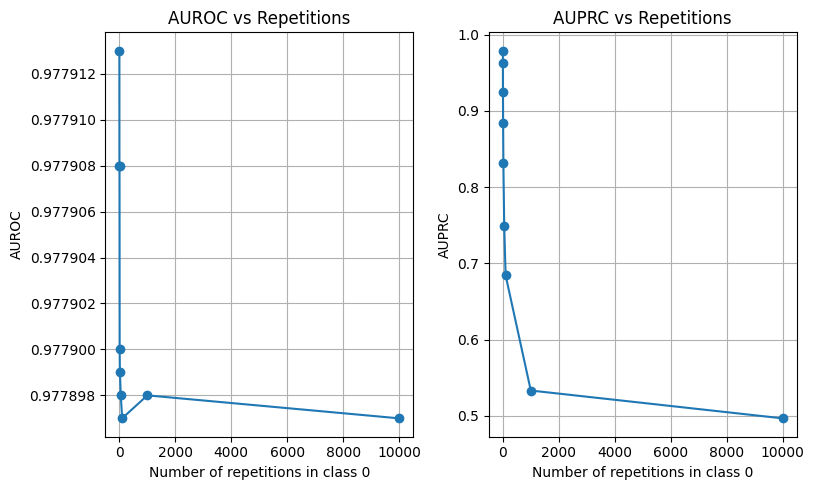

In [16]:
roc_aucs = []
pr_aucs = []
pr_gain_aucs = []
repetitions = [1, 2, 5, 10, 20, 50, 100, 1000, 10000]

# Для всех датасетов
datasets = [df1, df2, df5, df10, df20, df50, df100, df1000, df10k]

for i, df in enumerate(datasets):
    metrics = calculate_metrics(df, class_labels=[0, 1], feature_names=['Feature_1', 'Feature_2'], target_class=1)
    
    # Сохраняем метрики
    roc_aucs.append(metrics['roc_auc'])
    pr_aucs.append(metrics['pr_auc'])
    # pr_gain_aucs.append(metrics['pr_gain_auc'])

# Построение зависимости AUROC, AUPRC и AUPRgain от количества повторов
plt.figure(figsize=(12, 5))

# AUROC
plt.subplot(1, 3, 1)
plt.plot(repetitions, roc_aucs, marker='o', label='AUROC')
plt.xlabel('Number of repetitions in class 0')
plt.ylabel('AUROC')
plt.title('AUROC vs Repetitions')
plt.grid(True)

# AUPRC
plt.subplot(1, 3, 2)
plt.plot(repetitions, pr_aucs, marker='o', label='AUPRC')
plt.xlabel('Number of repetitions in class 0')
plt.ylabel('AUPRC')
plt.title('AUPRC vs Repetitions')
plt.grid(True)

# # AUPRgainC
# plt.subplot(1, 3, 3)
# plt.plot(repetitions, pr_gain_aucs, marker='o', label='AUPRgainC')
# plt.xlabel('Number of repetitions in class 0')
# plt.ylabel('AUPRgainC')
# plt.title('AUPRgainC vs Repetitions')
# plt.grid(True)

plt.tight_layout()
plt.show()

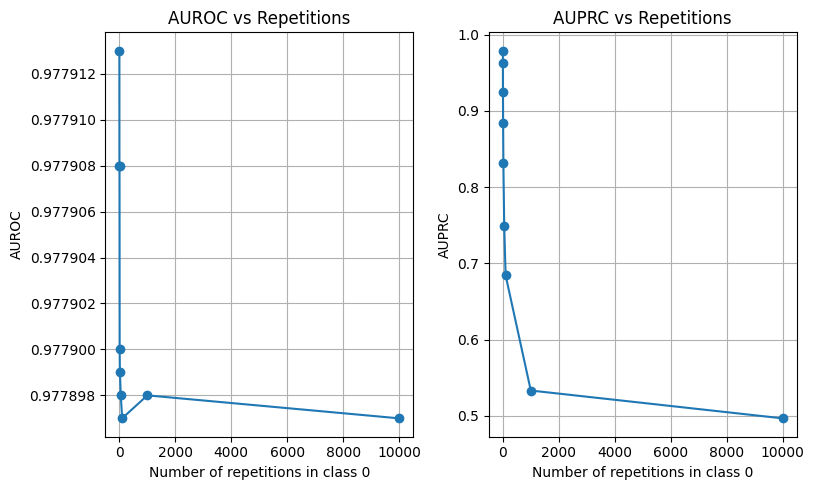

In [17]:
roc_aucs = []
pr_aucs = []
pr_gain_aucs = []
repetitions = [1, 2, 5, 10, 20, 50, 100, 1000, 10000]

# Для всех датасетов
datasets = [df1, df2, df5, df10, df20, df50, df100, df1000, df10k]

for i, df in enumerate(datasets):
    metrics = calculate_metrics(df, class_labels=[0, 1], feature_names=['Feature_1', 'Feature_2'], target_class=0)
    
    # Сохраняем метрики
    roc_aucs.append(metrics['roc_auc'])
    pr_aucs.append(metrics['pr_auc'])
    # pr_gain_aucs.append(metrics['pr_gain_auc'])

# Построение зависимости AUROC, AUPRC и AUPRgain от количества повторов
plt.figure(figsize=(12, 5))

# AUROC
plt.subplot(1, 3, 1)
plt.plot(repetitions, roc_aucs, marker='o', label='AUROC')
plt.xlabel('Number of repetitions in class 0')
plt.ylabel('AUROC')
plt.title('AUROC vs Repetitions')
plt.grid(True)

# AUPRC
plt.subplot(1, 3, 2)
plt.plot(repetitions, pr_aucs, marker='o', label='AUPRC')
plt.xlabel('Number of repetitions in class 0')
plt.ylabel('AUPRC')
plt.title('AUPRC vs Repetitions')
plt.grid(True)

# # AUPRgainC
# plt.subplot(1, 3, 3)
# plt.plot(repetitions, pr_gain_aucs, marker='o', label='AUPRgainC')
# plt.xlabel('Number of repetitions in class 0')
# plt.ylabel('AUPRgainC')
# plt.title('AUPRgainC vs Repetitions')
# plt.grid(True)

plt.tight_layout()
plt.show()

In [41]:
def bootstrap_roc_auc(y_real, y_proba, n_bootstraps=1000, ci=95):
    bootstrapped_scores = []
    rng = np.random.RandomState(42)

    for i in range(n_bootstraps):
        # Бутстрепинг с повторной выборкой
        indices = rng.randint(0, len(y_proba), len(y_proba))
        if len(np.unique(y_real[indices])) < 2:
            continue  # Пропуск, если в выборке только один класс

        fpr, tpr, _ = roc_curve(y_real[indices], y_proba[indices])
        score = auc(fpr, tpr)
        bootstrapped_scores.append(score)
    
    sorted_scores = np.sort(bootstrapped_scores)
    lower_bound = np.percentile(sorted_scores, (100 - ci) / 2)
    upper_bound = np.percentile(sorted_scores, 100 - (100 - ci) / 2)
    
    return lower_bound, upper_bound

In [42]:
def bootstrap_pr_auc(y_real, y_proba, n_bootstraps=1000, ci=95):
    bootstrapped_scores = []
    rng = np.random.RandomState(42)

    for i in range(n_bootstraps):
        # Бутстрепинг с повторной выборкой
        indices = rng.randint(0, len(y_proba), len(y_proba))
        if len(np.unique(y_real[indices])) < 2:
            continue  # Пропуск, если в выборке только один класс

        precision, recall, _ = precision_recall_curve(y_real[indices], y_proba[indices])
        score = auc(recall, precision)
        bootstrapped_scores.append(score)
    
    sorted_scores = np.sort(bootstrapped_scores)
    lower_bound = np.percentile(sorted_scores, (100 - ci) / 2)
    upper_bound = np.percentile(sorted_scores, 100 - (100 - ci) / 2)
    
    return lower_bound, upper_bound

In [51]:
def show_fold(df, k):
    y_real = []
    y_proba = []
    precision_array = []
    roc_tpr_array = []
    recall_array = np.linspace(0, 1, 100)  # Массив значений Recall для PR
    roc_fpr_array = np.linspace(0, 1, 100)  # Массив значений FPR для ROC
    df_selected = df[df['Class'].isin([0, 1])][['Feature_1', 'Feature_2'] + ['Class']]
    X = df_selected[['Feature_1', 'Feature_2']]
    y = df_selected['Class']
    skf = StratifiedKFold(n_splits=k)
    # Подготовка графиков
    fig, axes = plt.subplots(1, 2, figsize=(14, 7))  # Один график для PR, другой для ROC
    
    # Для каждого fold вычисляем PR и ROC кривые
    for i, (train_index, test_index) in enumerate(skf.split(X, y)):
        Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
        ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
        
        # Обучаем модель
        predictor.fit(Xtrain, ytrain)
        pred_proba = predictor.predict_proba(Xtest)
        
        # Вычисляем Precision-Recall для каждого fold
        precision_fold, recall_fold, _ = precision_recall_curve(ytest, pred_proba[:, 1])
        precision_fold, recall_fold = precision_fold[::-1], recall_fold[::-1]  # reverse order of results
        
        # Интерполяция Precision по общему массиву Recall
        prec_array = np.interp(recall_array, recall_fold, precision_fold)
        pr_auc = auc(recall_array, prec_array)
        precision_array.append(prec_array)
    
        lab_fold_pr = 'Fold %d AUPR=%.4f' % (i+1, pr_auc)
        axes[0].plot(recall_fold, precision_fold, alpha=0.3) # , label=lab_fold_pr
    
        # ROC-кривая для каждого fold
        fpr_fold, tpr_fold, _ = roc_curve(ytest, pred_proba[:, 1])
        roc_auc = auc(fpr_fold, tpr_fold)
        roc_tpr_interp = np.interp(roc_fpr_array, fpr_fold, tpr_fold)
        roc_tpr_array.append(roc_tpr_interp)
    
        lab_fold_roc = 'Fold %d AUROC=%.4f' % (i+1, roc_auc)
        axes[1].plot(fpr_fold, tpr_fold, alpha=0.3) # , label=lab_fold_roc
     
        # Собираем все реальные значения и предсказанные вероятности для бутстреппинга
        y_real.append(ytest)
        y_proba.append(pred_proba[:, 1])
    
    # Объединяем реальные значения и вероятности для общего расчета
    y_real = np.concatenate(y_real)
    y_proba = np.concatenate(y_proba)
    
    # Общая PR-кривая
    precision, recall, _ = precision_recall_curve(y_real, y_proba)
    lab_pr = 'Overall AUPR=%.4f' % (auc(recall, precision))
    axes[0].plot(recall, precision, lw=2, color='red', label=lab_pr)
    
    # Общая ROC-кривая
    fpr, tpr, _ = roc_curve(y_real, y_proba)
    lab_roc = 'Overall AUROC=%.4f' % (auc(fpr, tpr))
    axes[1].plot(fpr, tpr, lw=2, color='red', label=lab_roc)
    
    # Расчет доверительного интервала CI95 для общей PR-кривой
    lower_ci_pr, upper_ci_pr = bootstrap_pr_auc(y_real, y_proba, n_bootstraps=1000, ci=95)
    mean_precision = np.mean(precision_array, axis=0)
    std_precision = np.std(precision_array, axis=0)
    
    # Вычисляем нижнюю и верхнюю границы доверительного интервала для PR
    ci_lower_pr, ci_upper_pr = mean_precision - std_precision, mean_precision + std_precision
    axes[0].fill_between(recall_array, ci_lower_pr, ci_upper_pr, alpha=0.2, color='grey', label=f'95% CI [{lower_ci_pr:.4f}, {upper_ci_pr:.4f}]')
    
    # Расчет доверительного интервала CI95 для общей ROC-кривой
    lower_ci_roc, upper_ci_roc = bootstrap_roc_auc(y_real, y_proba, n_bootstraps=1000, ci=95)
    mean_tpr = np.mean(roc_tpr_array, axis=0)
    std_tpr = np.std(roc_tpr_array, axis=0)
    
    # Вычисляем нижнюю и верхнюю границы доверительного интервала для ROC
    ci_lower_roc, ci_upper_roc = mean_tpr - std_tpr, mean_tpr + std_tpr
    axes[1].fill_between(roc_fpr_array, ci_lower_roc, ci_upper_roc, alpha=0.2, color='grey', label=f'95% CI [{lower_ci_roc:.4f}, {upper_ci_roc:.4f}]')
    
    # Настройка графиков
    axes[0].legend(loc='lower left', fontsize='small')
    axes[0].set_title("PR curves with CI95; {} folds".format(skf.n_splits), weight="bold", fontsize=15)
    axes[0].set_xlabel("Recall (Sensitivity)", fontsize=12)
    axes[0].set_ylabel("Precision (PPV)", fontsize=12)
    
    axes[1].legend(loc='lower right', fontsize='small')
    axes[1].set_title("ROC curves with CI95; {} folds".format(skf.n_splits), weight="bold", fontsize=15)
    axes[1].set_xlabel("False Positive Rate", fontsize=12)
    axes[1].set_ylabel("True Positive Rate", fontsize=12)
    
    plt.tight_layout()
    plt.show()

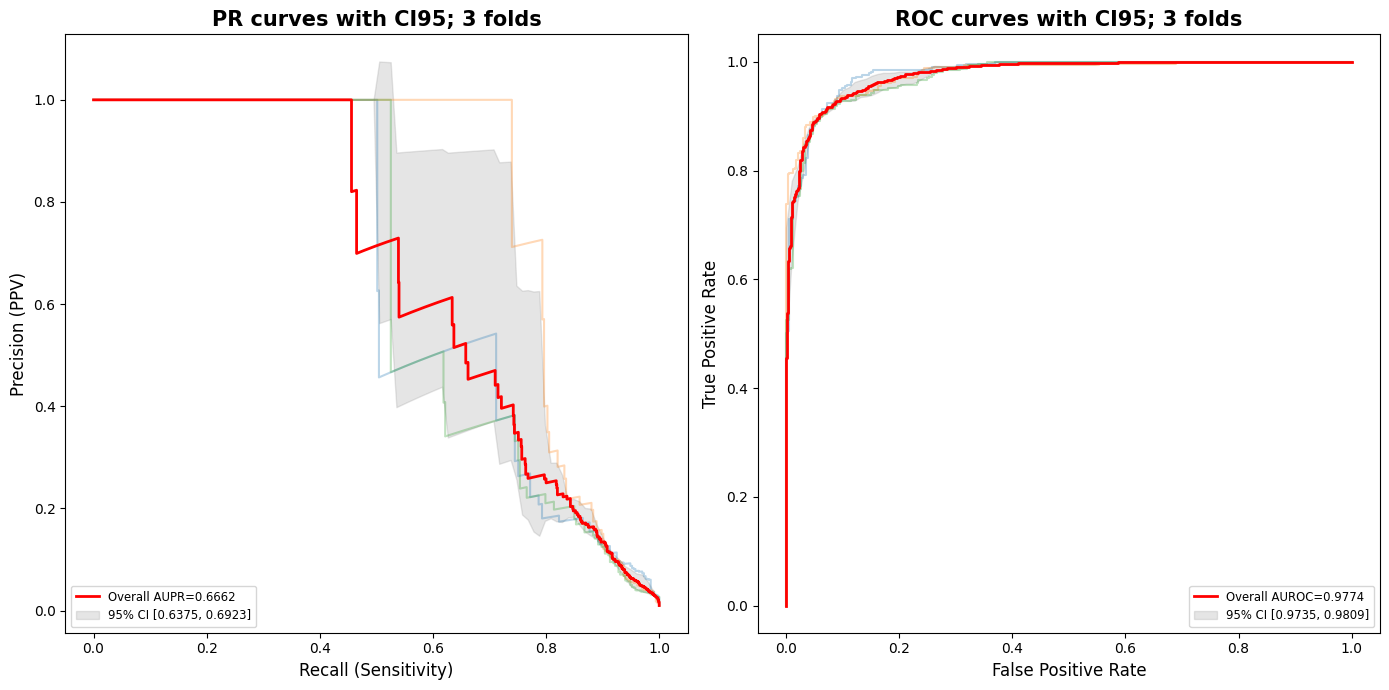

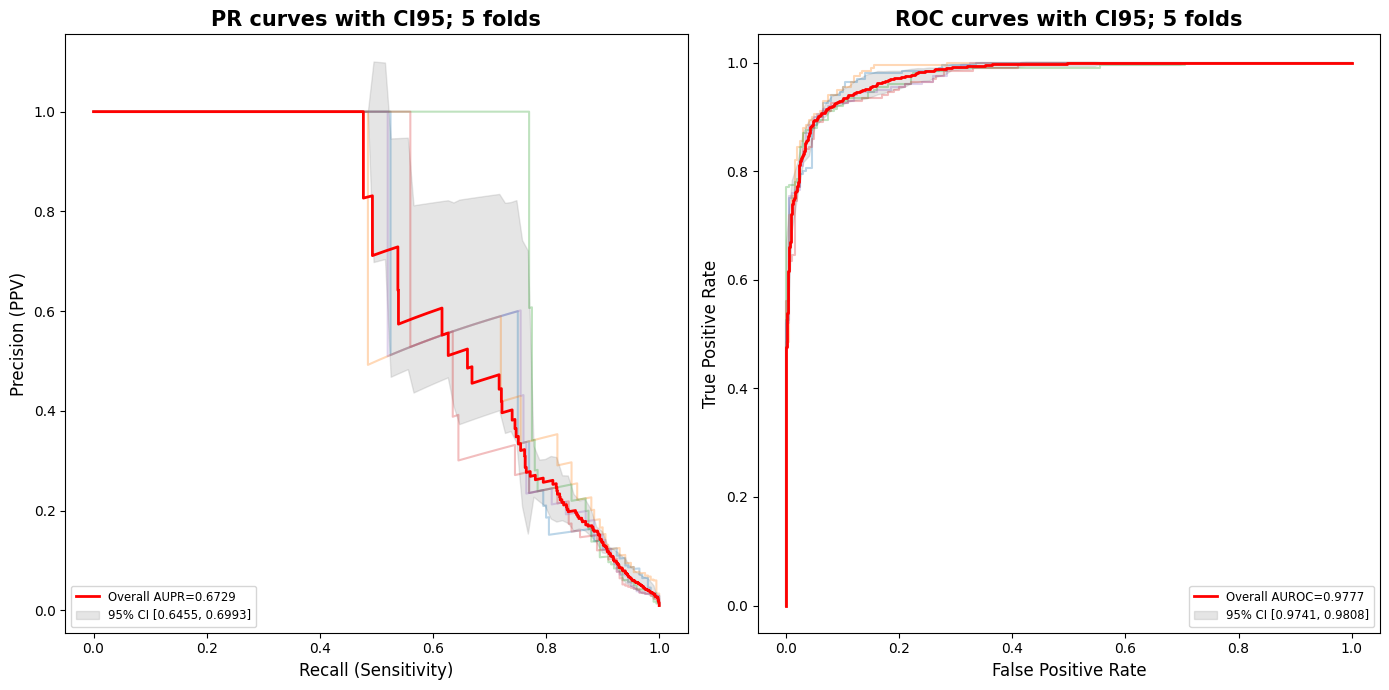

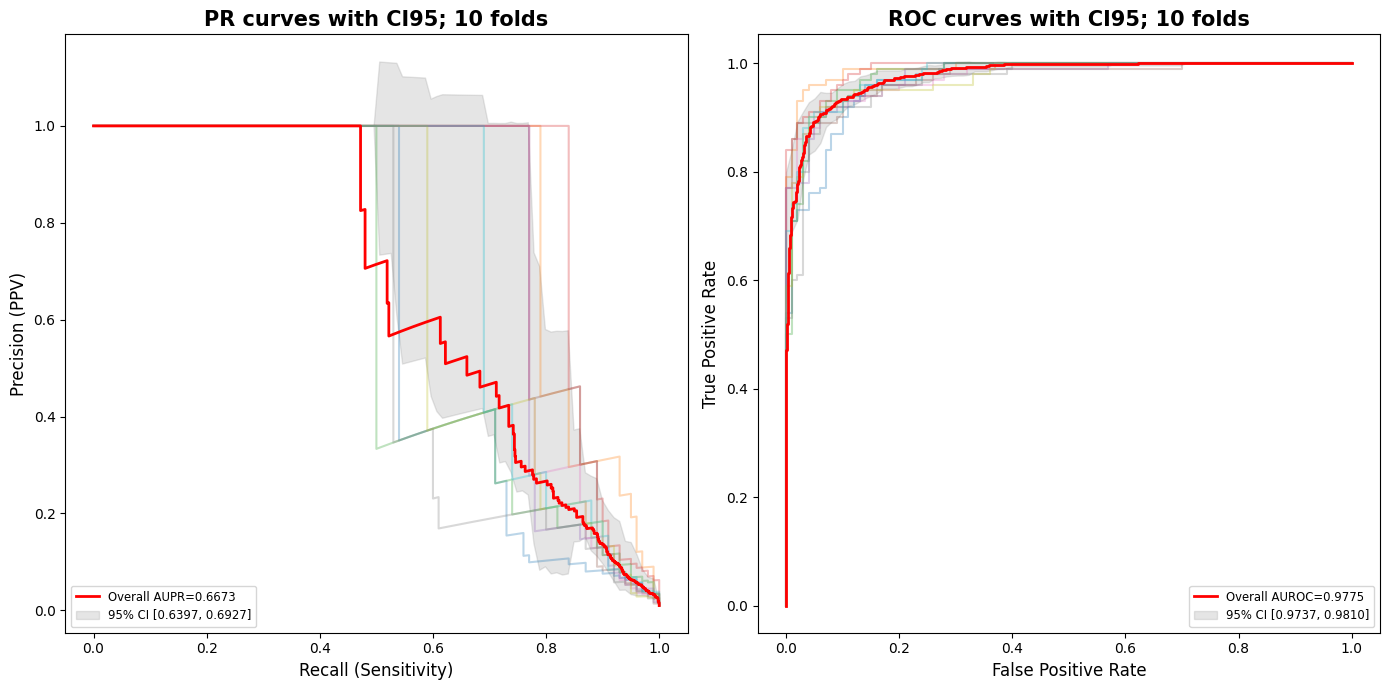

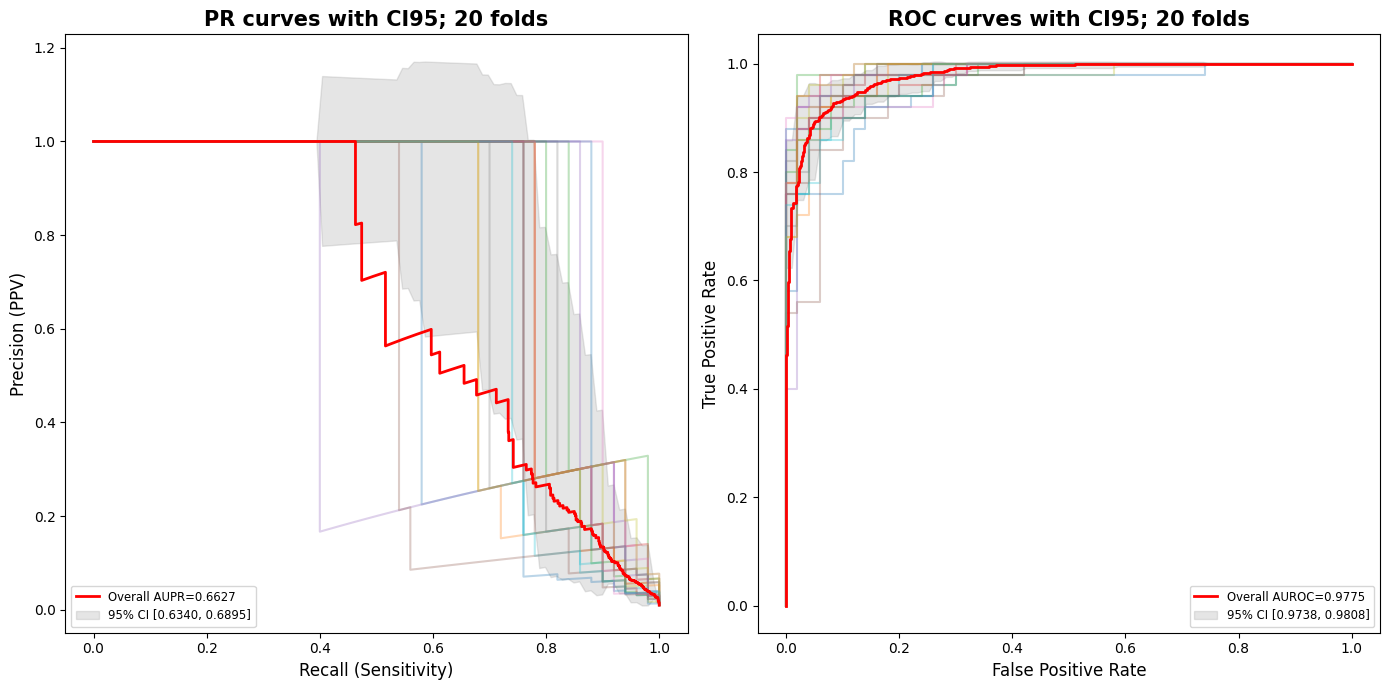

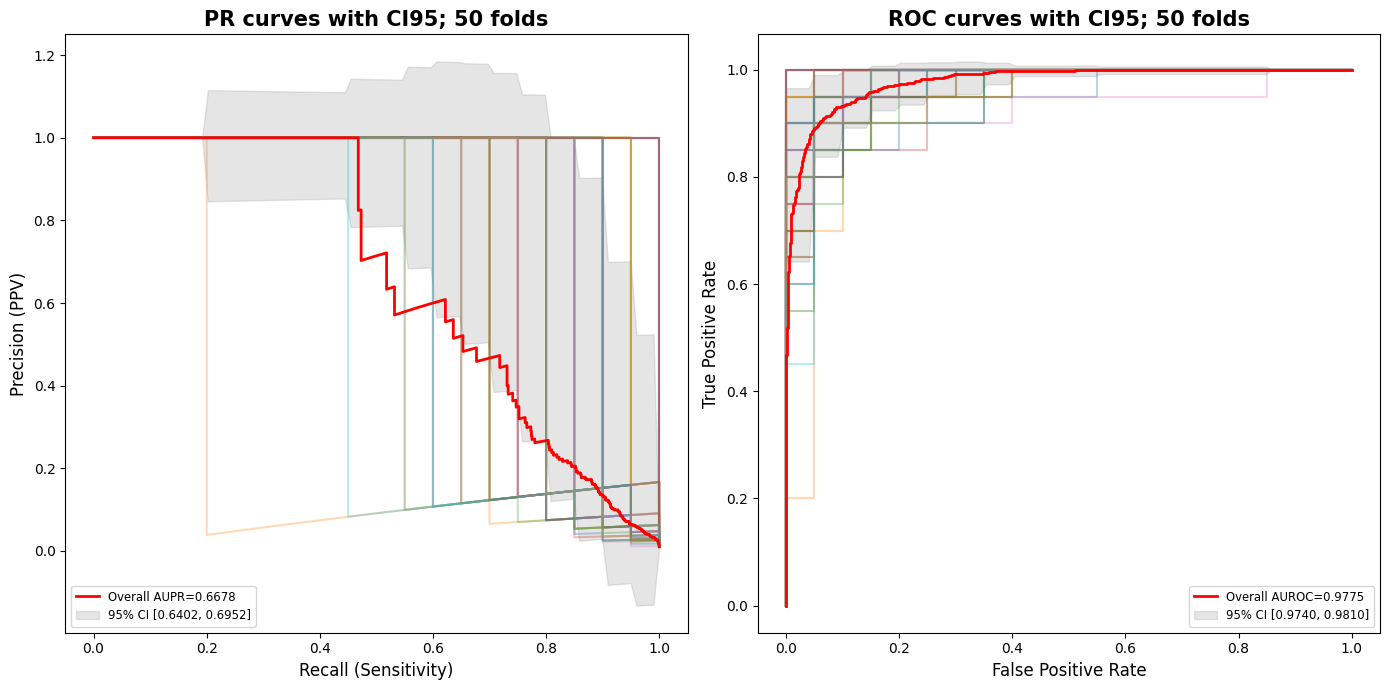

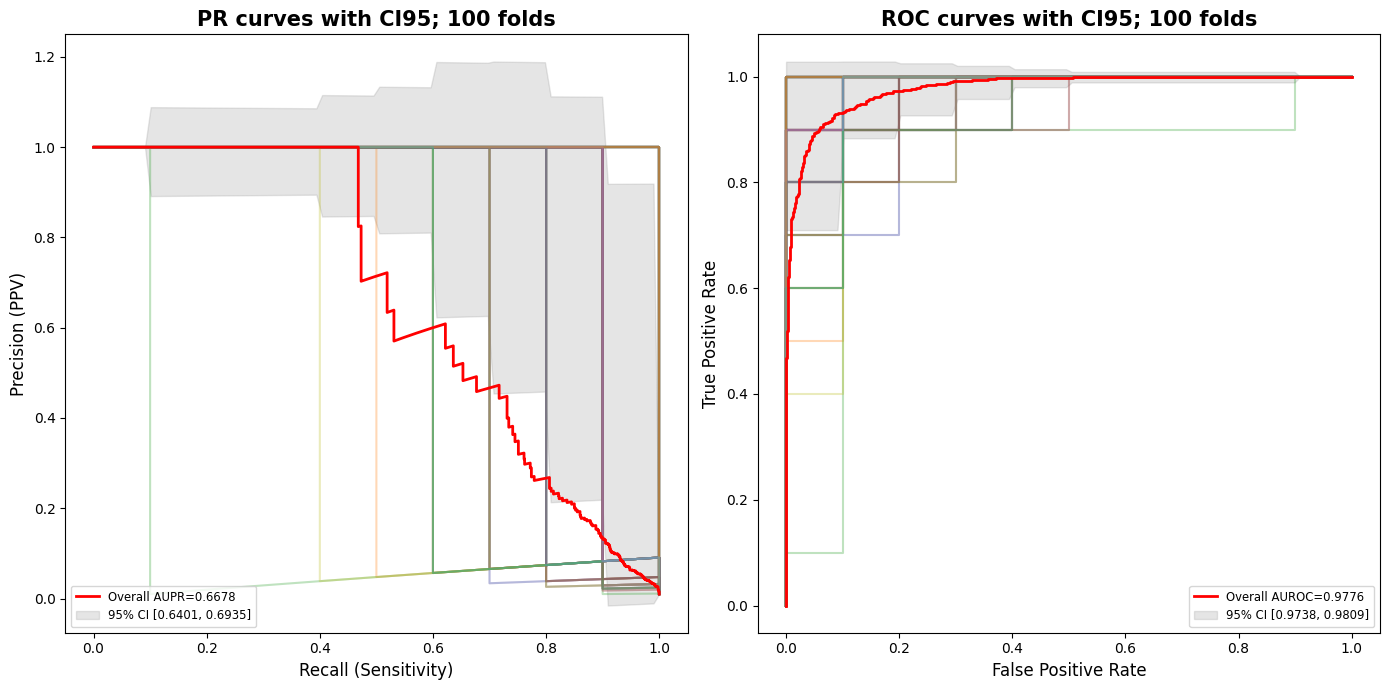

In [53]:
folds = [3, 5, 10, 20, 50, 100]
for k in folds:
    show_fold(df100, k)